<font size="+3"><strong>Data insights along with decision tree model</strong></font>

In [30]:
import pickle
from scipy.io import arff

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier


In [31]:
data = arff.loadarff("/workspaces/codespaces-jupyter/data/1year.arff")
df = pd.DataFrame(data[0])
print(df.shape)

df.head()

(7027, 65)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [32]:
# Assuming your DataFrame is called df
df["class"] = df["class"].str.decode("utf-8").astype(int)

* The description of the data in [data_dictionary](notebooks/data_dictionary.ipynb)

In [33]:
df.isnull().sum()

Attr1      3
Attr2      3
Attr3      3
Attr4     30
Attr5      8
          ..
Attr61    22
Attr62     0
Attr63    30
Attr64    34
class      0
Length: 65, dtype: int64

<Axes: >

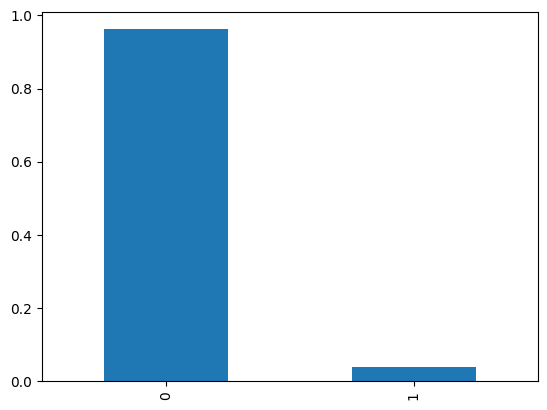

In [34]:
df["class"].value_counts(normalize=True).plot(kind="bar")

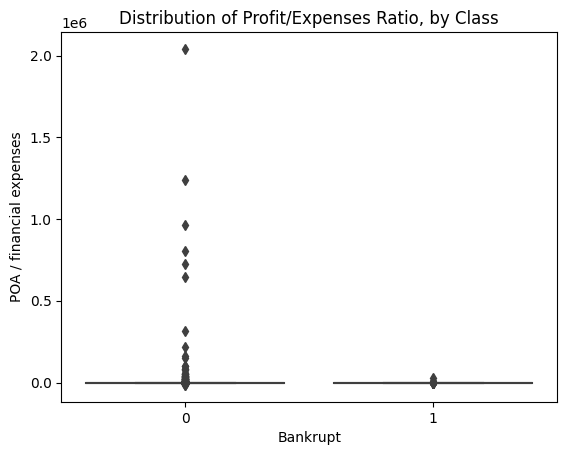

In [35]:
sns.boxplot(x="class",y="Attr27",data=df)
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

In [36]:
df["Attr27"].describe().apply("{0:,.0f}".format)

count        6,716
mean         1,322
std         35,504
min        -14,790
25%              0
50%              1
75%              6
max      2,040,800
Name: Attr27, dtype: object

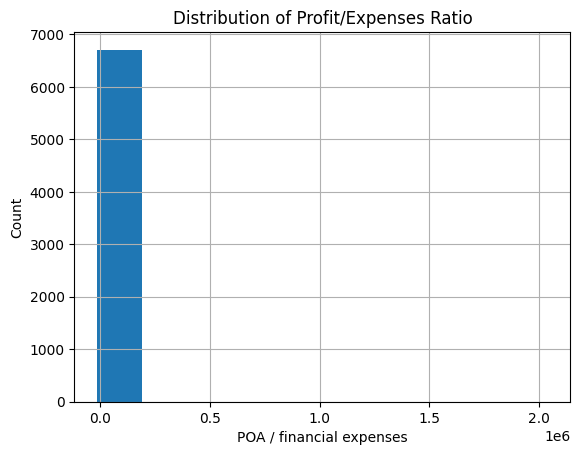

In [37]:
df["Attr27"].hist()
plt.xlabel("POA / financial expenses")
plt.ylabel("Count"),
plt.title("Distribution of Profit/Expenses Ratio");

In [38]:
q1, q9 = df["Attr27"].quantile([0.1,0.9])
mask = df["Attr27"].between(q1,q9)

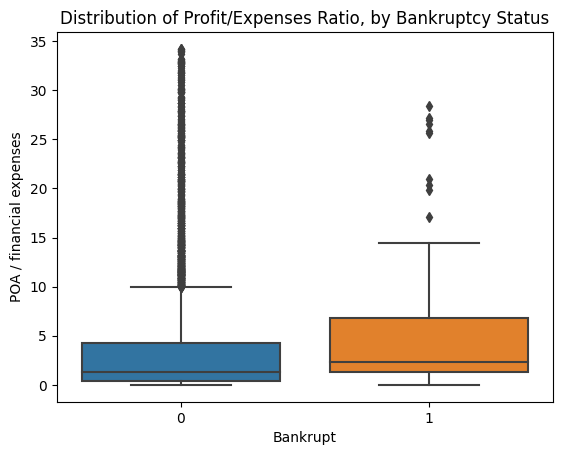

In [39]:
q1, q9 = df["Attr27"].quantile([0.1,0.9])
mask = df["Attr27"].between(q1,q9)
sns.boxplot(x="class",y="Attr27",data=df[mask])

plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Bankruptcy Status");

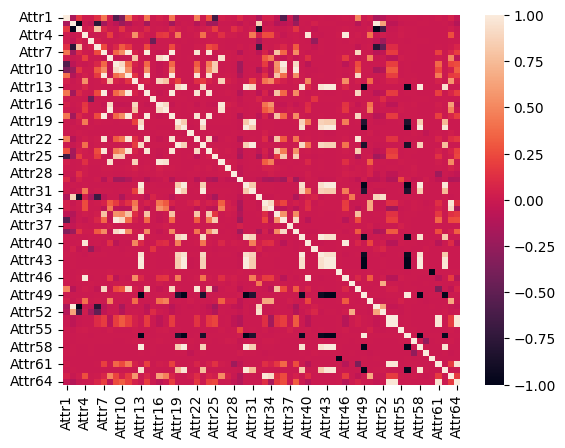

In [40]:
corr = df.drop(columns="class").corr()
sns.heatmap(corr);

In [41]:
target = "class"
X = df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (7027, 64)
y shape: (7027,)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5621, 64)
y_train shape: (5621,)
X_test shape: (1406, 64)
y_test shape: (1406,)


* Checking whether under sample is better than resample or not

In [44]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train,y_train)
print(X_train_under.shape)
X_train_under.head()

(440, 64)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.083801,0.69137,-0.12093,0.71466,-37.7370,0.000000,0.15832,0.44641,3.8944,0.30863,...,-219.26,0.061055,0.27152,0.96160,0.851650,20.8730,179.7600,39.720,9.1893,5.5864
1,0.475390,0.40938,0.54733,2.37410,302.8700,-0.012545,0.58823,1.44270,1.1372,0.59062,...,6707.90,0.460370,0.80491,0.51249,0.000000,29.9560,9.9641,127.850,2.8549,20.9260
2,0.173240,0.29784,0.30042,2.35970,30.7480,0.292910,0.21601,2.35750,1.1938,0.70216,...,5752.10,0.162350,0.24673,0.83765,0.109510,6.4705,4.6051,62.415,5.8480,2.6996
3,0.112740,0.52959,0.17520,2.10640,67.9310,0.000000,0.11274,0.88824,1.0380,0.47041,...,1673.90,0.247870,0.23966,0.76232,0.757990,43.6840,5.5789,55.683,6.5550,1.5576
4,0.346030,0.39724,0.37842,1.96130,6.3365,0.000000,0.43177,1.51740,3.7657,0.60276,...,1589.00,0.125540,0.57408,0.88544,0.005927,12.8870,9.8517,38.157,9.5656,16.5050


In [45]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape)
X_train_over.head()

(10802, 64)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.535540,0.052232,0.441390,10.49400,165.210000,0.000000,0.535540,18.14500,1.81560,0.94777,...,27537.0,0.536310,0.565050,0.48781,0.000000,25.4630,4.6517,9.3465,39.0520,3.5452
1,0.000681,0.486750,-0.017475,0.94759,-5.587200,0.032626,0.000681,0.45175,0.99660,0.21989,...,-262.9,-0.003411,0.003096,1.00340,0.697370,106.4600,13.3880,35.6920,10.2260,4.9842
2,0.081678,0.422160,0.456520,2.70710,-0.063859,0.000000,0.101790,1.36880,1.97560,0.57784,...,2266.8,0.044539,0.141350,0.94900,0.000000,4.3322,9.3488,49.4080,7.3874,7.1565
3,0.172720,0.159200,0.627720,5.13760,16.825000,0.000000,0.172720,5.28150,1.93310,0.84080,...,1421.6,0.097010,0.205430,0.91067,0.008902,3.5406,9.2799,28.6460,12.7420,8.7645
4,0.070920,0.826400,-0.091116,0.71330,-85.703000,0.000000,0.070920,0.21007,0.79853,0.17360,...,-3796.8,0.102350,0.408520,0.91186,1.896600,11.1470,6.0414,145.2700,2.5126,1.0326


# Building simple model
* baseline model

In [46]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9609


In [47]:
model_reg = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)
model_reg.fit(X_train, y_train)

# Fit on `X_train_under`, `y_train_under`
model_under = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)
model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

# Evaluate

In [48]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train,y_train)
    acc_test = m.score(X_test,y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9573
Training Accuracy: 0.8098
Test Accuracy: 0.7845
Training Accuracy: 1.0
Test Accuracy: 0.9701


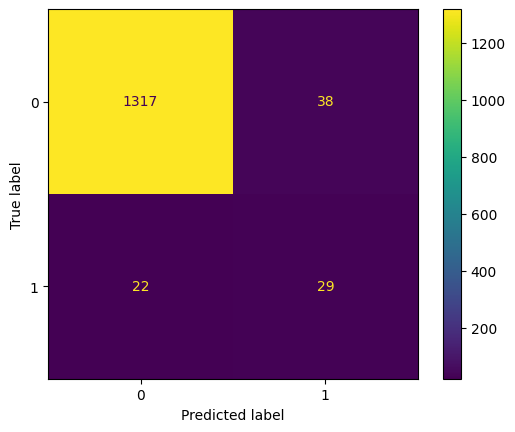

In [49]:
ConfusionMatrixDisplay.from_estimator(model_reg,X_test,y_test);

In [50]:
depth = model_over.named_steps["decisiontreeclassifier"].get_depth()
print(depth)

28


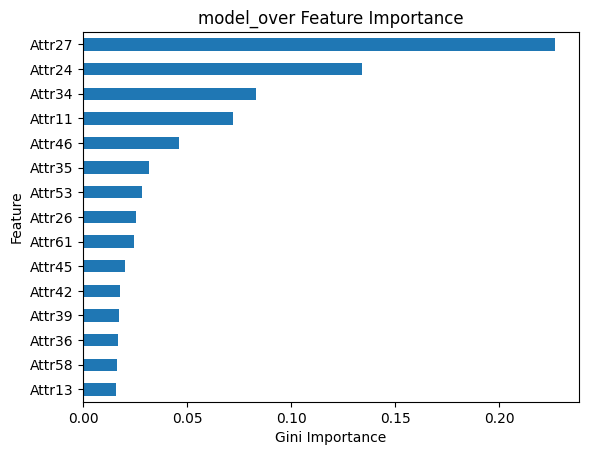

In [51]:
importances = model_over.named_steps["decisiontreeclassifier"].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances,index=X_train_over.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

# Saving the model

In [ ]:
with open("model-5-2.pkl","wb") as f:
    pickle.dump(model_over, f)

In [52]:
with open("model.pkl","wb") as f:
    pickle.dump(model_over, f)